# Quantum Circuits and Qubits
## Quantum Circuits

In [12]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
import numpy as np

qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]  # |1>
qc.initialize(initial_state,0)
qc.rx(np.pi/4,0)       # Rotation of pi/4 over the x axis                                   
qc.measure_all()
qc.draw()

┌─────────────────┐┌─────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├┤ RX(π/4) ├─░─┤M├
        └─────────────────┘└─────────┘ ░ └╥┘
meas: 1/══════════════════════════════════╩═
                                          0

## Quantum Simulator

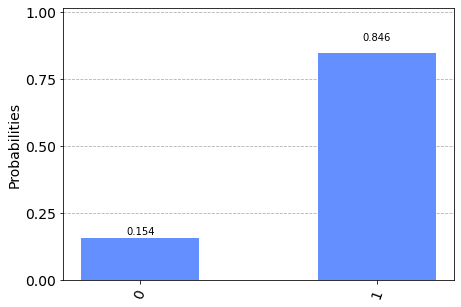

In [13]:
sim = Aer.get_backend('aer_simulator') # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)                    # Create Qobj for the simulator to run
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## Measurement

A simple example: the $X$-measurement. It is based on the following identity:
$$ X=HZH$$

In [1]:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit,cbit)
    qc.h(qubit)
    return qc